In [50]:
import pyvis
from pyvis.network import Network
import pandas as pd
import sys
import numpy as np
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import community as community_louvain




fraud_net = Network(
    notebook=False,
    cdn_resources="remote",
    bgcolor="#222222",
    font_color="white",
    height="1700px",
    width="100%",select_menu=True,filter_menu=True)


#set the physics layout of the network
fraud_net.barnes_hut()
fraud_data = pd.read_csv("C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\Networkx\\stmt (1).csv")
fraud_data.sort_values(by=['Particulars'],inplace=True,ignore_index=True)
#grouping 
fraud_data = fraud_data.groupby(['Particulars'],sort=False,as_index=False).count()
fraud_data['Particulars'] =  fraud_data['Particulars'].astype(str)
fraud_data['Balance']= fraud_data['Balance'].astype(str)


targets = fraud_data['Particulars']
Balance =  fraud_data['Balance']

edge_data = zip(targets, Balance)
for e in edge_data: 
    src = '245435265666544'
    dst = e[0]
    w  =  e[1]
    fraud_net.add_node(src, src, title=src)
    fraud_net.add_node(dst, dst, title=dst)
    fraud_net.add_edge(src, dst, value=w)
    

neighbor_map = fraud_net.get_adj_list()
# add neighbor data to node hover data
for node in fraud_net.nodes:
    node["title"] += "->transactions from : " + \
    ",".join(neighbor_map[node["id"]])+"\n"
    node["value"] = len(neighbor_map[node["id"]])
    





fraud_net.show_buttons(filter_=True)
fraud_net.show("index.html")




In [49]:
# graph visualization and analysis on graph
""""
# create graph from pandas data frame
# create Graph object 
G = nx.from_pandas_edgelist(fraud_data,source='245435265666544',
                              target='Particulars',
                             edge_attr='Balance',
                             create_using = nx.Graph()) 

# Graph visualization-Networkx
plt.figure(figsize=(11,8))
#draw circular layout
pos = nx.kamada_kawai_layout(G)
#nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos = pos)
"""

'"\n# create graph from pandas data frame\n# create Graph object \nG = nx.from_pandas_edgelist(fraud_data,source=\'245435265666544\',\n                              target=\'Particulars\',\n                             edge_attr=\'Balance\',\n                             create_using = nx.Graph()) \n\n# Graph visualization-Networkx\nplt.figure(figsize=(11,8))\n#draw circular layout\npos = nx.kamada_kawai_layout(G)\n#nx.draw(G,with_labels=True,node_color=\'skyblue\',edge_cmap=plt.cm.Blues,pos = pos)\n'

<AxesSubplot: >

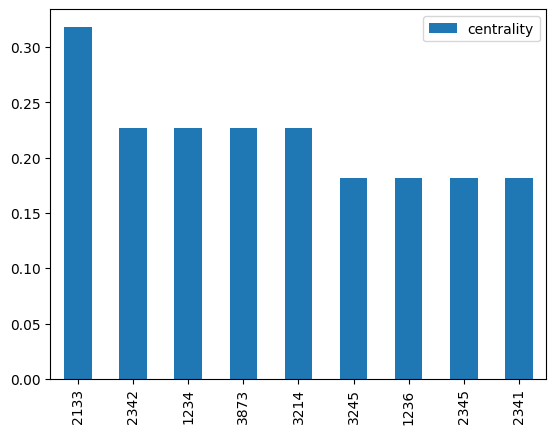

In [33]:
#Degree centrality
#most number of nodes connected to distinct nodes

degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'])
#plot top 10 nodes
degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind="bar")


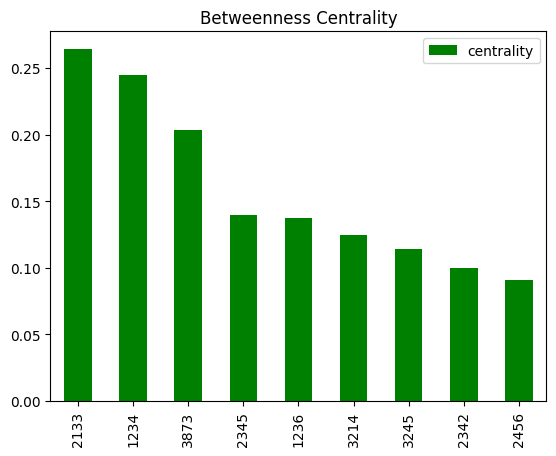

In [7]:
#Betweeness centrality 
# how often the node act as a bridge along the shortest path b/w the two other nodes
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='green')
plt.title('Betweenness Centrality')
plt.show();

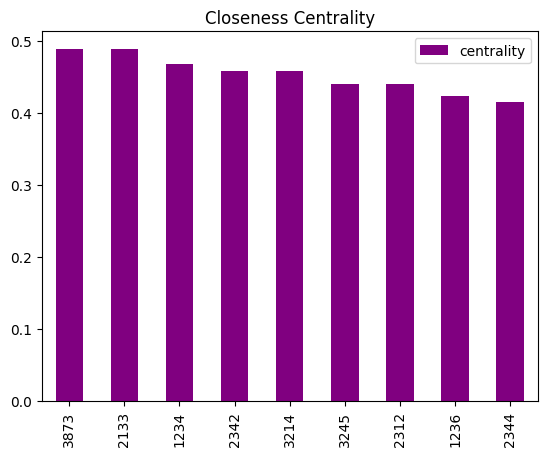

In [8]:
#Closeness Centrality
# how long it take to send information from one node to anoter node.

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='purple')
plt.title('Closeness Centrality')
plt.show();

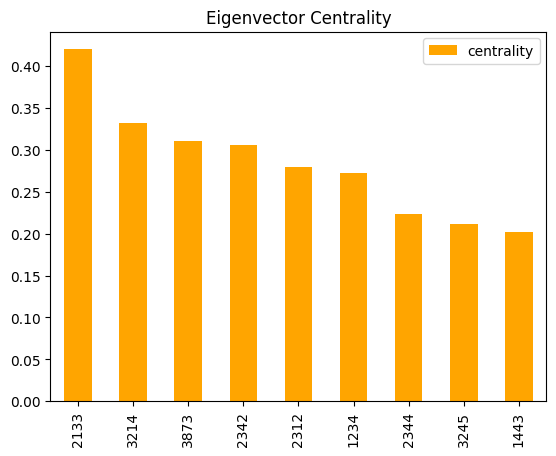

In [9]:
#Prestige/Eigenvector Centrality -> measure transitive influence of nodes . A high eigenvector score means that a node is connected to many nodes who thwmselves have high score..

prestige_dict= nx.eigenvector_centrality(G)
prestige_df = pd.DataFrame.from_dict(prestige_dict, orient='index',columns=['centrality'])


#Plot top 10 nodes

prestige_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color= 'orange')
plt.title('Eigenvector Centrality')
plt.show();